# Analiza danych w języku Python - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika. Wyjątek stanowi ostatni z projektów, gdzie po konsultacji z prowadzącym zajęcia możliwa jest większa swoboda w doborze pakietów.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

## Zestaw zadań 2: Zmiany GDP w okresie globalnego kryzysu finansowego 2008–2009 (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Poniższy kod wczytuje do zmiennej `recession_data_1` dane z przygotowanego wcześniej pliku recession_data_1.pkl oraz dane z pliku recession_table_1.pkl do zmiennej `recession_table_1`.

W celu wczytania danych umieść plik w tym samym folderze, w którym znajduje się notatnik.

In [3]:
recession_data_1 = pd.read_pickle("recession_data_1.pkl")
recession_data_1

,Country Name,Region Name,Income Group,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,,,
AFG,Afghanistan,Asia,Low,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355
ALB,Albania,Europe,Lower middle,5.902659,5.983260,7.500041,3.354289,3.706938,2.545406
DZA,Algeria,Africa,Upper middle,1.700000,3.400000,2.400000,1.600000,3.600000,2.900000
ASM,American Samoa,Oceania,Upper middle,-4.098361,1.851852,-2.657343,-4.166667,0.299850,0.000000
AND,Andorra,Europe,High,4.808689,1.553188,-5.559186,-5.302847,-1.974958,-0.008070
...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),Americas,High,3.504993,4.010594,1.218625,-6.594789,0.596383,-8.204246
PSE,West Bank and Gaza,Asia,Lower middle,-0.996556,3.788282,7.429182,8.593491,5.777362,9.600808
YEM,"Yemen, Rep.",Asia,Low,3.170409,3.338428,3.647569,3.866230,7.702307,-12.714897


In [4]:
recession_table_1 = pd.read_pickle("recession_table_1.pkl")
recession_table_1


,"(-20, -15]","(-15, -10]","(-10, -5]","(-5, 0]","(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]"
Year,,,,,,,,,,,
2006,0.0,0.0,0.005051,0.075758,0.358586,0.469697,0.070707,0.005051,0.0,0.010101,0.005051
2007,0.0,0.0,0.010101,0.030303,0.393939,0.454545,0.085859,0.020202,0.005051,0.0,0.0
2008,0.005051,0.005051,0.025253,0.131313,0.454545,0.323232,0.045455,0.010101,0.0,0.0,0.0
2009,0.010101,0.045455,0.131313,0.29798,0.343434,0.136364,0.030303,0.0,0.005051,0.0,0.0
2010,0.0,0.0,0.025253,0.085859,0.449495,0.363636,0.060606,0.005051,0.005051,0.005051,0.0
2011,0.0,0.010101,0.030303,0.085859,0.484848,0.343434,0.035354,0.005051,0.005051,0.0,0.0


### Zadanie 4: Obliczanie wartości wybranych opisowych charakterystyk rozkładu w oparciu o szereg szczegółowy [5 pkt]

Korzystając z danych zawartych w tablicy `recession_data_1` oraz funkcji pakietu pandas oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- wartość minimalna (ang. minimum),
- kwartyle (ang. quartiles),
- wartość maksymalna (ang. maximum),
- eksces/kurtoza (ang. excess kurtosis),
- skośność (ang. skew).

Zestaw wyniki w tablicy `descriptive_parameters_1`.

Indeks:
 - zawiera następujące nazwy wierszy: mean, std, min, Q1, Q2, Q3, max, kurt, skew.
 
Kolumny:
 - lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str)

In [5]:
from scipy.stats import kurtosis, skew
numeric_data = recession_data_1.select_dtypes(include='number')

# Pusty słownik
results = {
    "mean": [],
    "std": [],
    "min": [],
    "Q1": [],
    "Q2": [],  # mediana
    "Q3": [],
    "max": [],
    "kurt": [],
    "skew": []
}

#Iteracja po latach
for col in numeric_data.columns:
    data = numeric_data[col].dropna()
    results["mean"].append(data.mean())
    results["std"].append(data.std())
    results["min"].append(data.min())
    results["Q1"].append(data.quantile(0.25))
    results["Q2"].append(data.median())
    results["Q3"].append(data.quantile(0.75))
    results["max"].append(data.max())
    results["kurt"].append(kurtosis(data, fisher=True, bias=False))  
    results["skew"].append(skew(data, bias=False))                   

#Koncowy DataFrame
descriptive_parameters_1 = pd.DataFrame(results, index=numeric_data.columns).T

#Indeks miar
descriptive_parameters_1.index = ["mean", "std", "min", "Q1", "Q2", "Q3", "max", "kurt", "skew"]

#Wynik
display(descriptive_parameters_1.round(2))

,2006,2007,2008,2009,2010,2011
mean,5.68,5.68,3.66,-0.10,4.29,3.81
std,4.66,4.13,4.49,5.81,4.50,4.35
min,-6.87,-6.68,-17.67,-17.57,-8.92,-12.71
Q1,3.46,3.20,1.00,-3.74,1.72,1.64
Q2,5.40,5.62,3.81,0.13,4.13,3.82
Q3,7.56,7.70,6.24,3.50,6.71,6.32
max,34.50,25.00,17.80,21.39,25.12,21.62
kurt,10.16,2.88,3.17,0.93,3.44,3.11
skew,1.87,0.72,-0.60,-0.15,0.65,-0.11


In [6]:
### Komórka testowa
# Testy wybranych wartości z tablicy
assert np.isclose(descriptive_parameters_1.loc["mean", "2006"], 5.678241)
assert np.isclose(descriptive_parameters_1.loc["std", "2007"], 4.128360)
assert np.isclose(descriptive_parameters_1.loc["min", "2008"], -17.668946)
assert np.isclose(descriptive_parameters_1.loc["Q1", "2009"], -3.739051)
assert np.isclose(descriptive_parameters_1.loc["Q2", "2010"], 4.132582)
assert np.isclose(descriptive_parameters_1.loc["Q3", "2011"], 6.316869)
assert np.isclose(descriptive_parameters_1.loc["max", "2006"], 34.5)
assert np.isclose(descriptive_parameters_1.loc["kurt", "2007"], 2.877701)
assert np.isclose(descriptive_parameters_1.loc["skew", "2008"], -0.597186)

### Zadanie 5: Praca z szeregami rozdzielczymi (25 pkt)
Na potrzeby realizacji tego zadania załóżmy, że nie były dostępne dane szczegółowe, a jedynie tablica szeregu rozdzielczego przedziałowego. Ma to istotny wpływ na proces dokonywania obliczeń i wizualizacji wyników. Wykonaj poniższe zadanie bazując wyłącznie na danych z tablicy `recession_table_1`.

Uwaga! Zadanie nie zawiera pełnej analizy danych, i ma wyłącznie charakter demonstracji pokazującej jak można prowadzić analizę, gdy nie są dostępne dane szczegółowe.

#### a) Obliczanie wartości wybranych opisowych charakterystyk rozkładu

Korzystając z danych zawartych w tablicy `recession_table_1` oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- kwartyle (ang. quartiles),
- moda (ang. mode).

Zestaw wyniki w tablicy `descriptive_parameters_2`.

> Indeks: </br>
> Zawiera wiersze o następujących nazwach: mean, std, Q1, Q2, Q3, mode.

> Kolumny: lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str) </br>

Uwaga! W celu otrzymania maksymalnej liczby punktów otrzymane wyniki powinny być w całości wynikiem pracy napisanego kodu, bez manualnego określania, w którym przedziale znajdują się określone statystyki itp.

In [7]:
def calculate_interval_stats_from_columns(df):
    result = pd.DataFrame(index=["mean", "std", "Q1", "Q2", "Q3", "mode"])

    for idx in df.index:
        row = df.loc[idx]
        ni = row.values.astype(float)
        intervals = row.index

        xi = np.array([(interval.left + interval.right) / 2 for interval in intervals])
        n = np.sum(ni)
        #srednia
        mean_val = np.sum(xi * ni) / n
        #odchylenie
        std_val = np.sqrt(np.sum((xi - mean_val) ** 2 * ni) / n)

        #kwartyle
        def find_quantile(q_frac):
            Nk = q_frac * n
            cumulative = np.cumsum(ni)
            k = np.searchsorted(cumulative, Nk)
            if k == 0:
                prev_sum = 0
            else:
                prev_sum = cumulative[k - 1]
            fq = ni[k]
            L = intervals[k].left
            h = intervals[k].right - intervals[k].left
            return L + ((Nk - prev_sum) / fq) * h
          
        q1 = find_quantile(0.25)
        q2 = find_quantile(0.5)
        q3 = find_quantile(0.75)

        ##moda
        modal_idx = np.argmax(ni)
        if 0 < modal_idx < len(ni) - 1:
            L = intervals[modal_idx].left
            f1 = ni[modal_idx - 1]
            f2 = ni[modal_idx]
            f3 = ni[modal_idx + 1]
            h = intervals[modal_idx].right - intervals[modal_idx].left
            mode_val = L + ((f2 - f1) / ((f2 - f1) + (f2 - f3))) * h
        else:
            mode_val = (intervals[modal_idx].left + intervals[modal_idx].right) / 2

        result[str(idx)] = [mean_val, std_val, q1, q2, q3, mode_val]

    return result.round(6)


descriptive_parameters_2 = calculate_interval_stats_from_columns(recession_table_1)

descriptive_parameters_2

,2006,2007,2008,2009,2010,2011
mean,5.606061,5.782828,3.636364,-0.101010,4.545455,3.863636
std,4.853809,4.184001,4.751033,6.045066,4.685347,4.568125
Q1,2.359155,2.660256,0.916667,-3.940678,1.544944,1.276042
Q2,5.645161,5.722222,3.666667,0.220588,4.325843,3.854167
Q3,8.306452,8.472222,6.992188,3.860294,7.604167,7.022059
mode,6.089109,5.705882,3.555556,0.900000,4.044944,3.691589


In [8]:
### Komórka testowa
# Testy wybranych wartości z tablicy
assert np.isclose(descriptive_parameters_2.loc["mean", "2006"], 5.606061)
assert np.isclose(descriptive_parameters_2.loc["std", "2007"], 4.184001)
assert np.isclose(descriptive_parameters_2.loc["Q1", "2008"], 0.916667)
assert np.isclose(descriptive_parameters_2.loc["Q2", "2009"], 0.220588)
assert np.isclose(descriptive_parameters_2.loc["Q3", "2010"], 7.604167)
assert np.isclose(descriptive_parameters_2.loc["mode", "2011"], 3.691589)

#### b) Wizualizacja
Zwizualizuj dane z tablic `recession_table_1` oraz `descriptive_parameters_2` za pomocą:
 - histogramu zliczeń (lewa oś wykresu) z nałożonym na niego łamaną częstości skumulowanej (prawa oś wykresu) wykonanych dla jednego, wybranego przez siebie roku,
 - diagramów częstości wyliczonych dla poszczególnych lat i skonstruowanych w obarciu o całość danych,
 - wykresów pudełkowych wyliczonych dla poszczególnych lat i skonstruowanych w obarciu o całość danych.
 
Zestaw wykresy na pojedynczej figurze (siatka wykresów 2x2, przy czym wykres pudełkowy zajmuje oba pola w dolnym wierszu figury). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Postaraj się, w miarę istniejących możliwości, aby formatowanie wykresów było jak najbardziej zbliżone do formatowania wykresów przygotowanych w poprzednim notatniku, dodatkowo:

dla histogramu i łamanej częstości skumulowanej:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- ustaw kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- jako etykiety danych na osi x ustaw przedziały danych z tablicy `recession_table_1`,

dla diagramów częstości:
- ustaw kolory identyczne z tymi przypisanymi poszczególnym latom w zadaniu 3a,
- dodaj do wykresu legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym latom w taki sposób, aby nie zasłaniała/zasłaniały znajdujących się na wykresach danych,
- jako etykiety danych na osi x ustaw przedziały danych z tablicy `recession_table_1`,

dla wykresu pudełkowego:
- ustaw kolor linii pudełka identyczny z kolorem ich wypełnienia w zadaniu 3b,
- ustaw kolor linii wąsów identyczny z ich kolorem w zadaniu 3b.

Wykresy pudełkowe powinny zawierać oznaczenia wartości średniej oraz mediany.

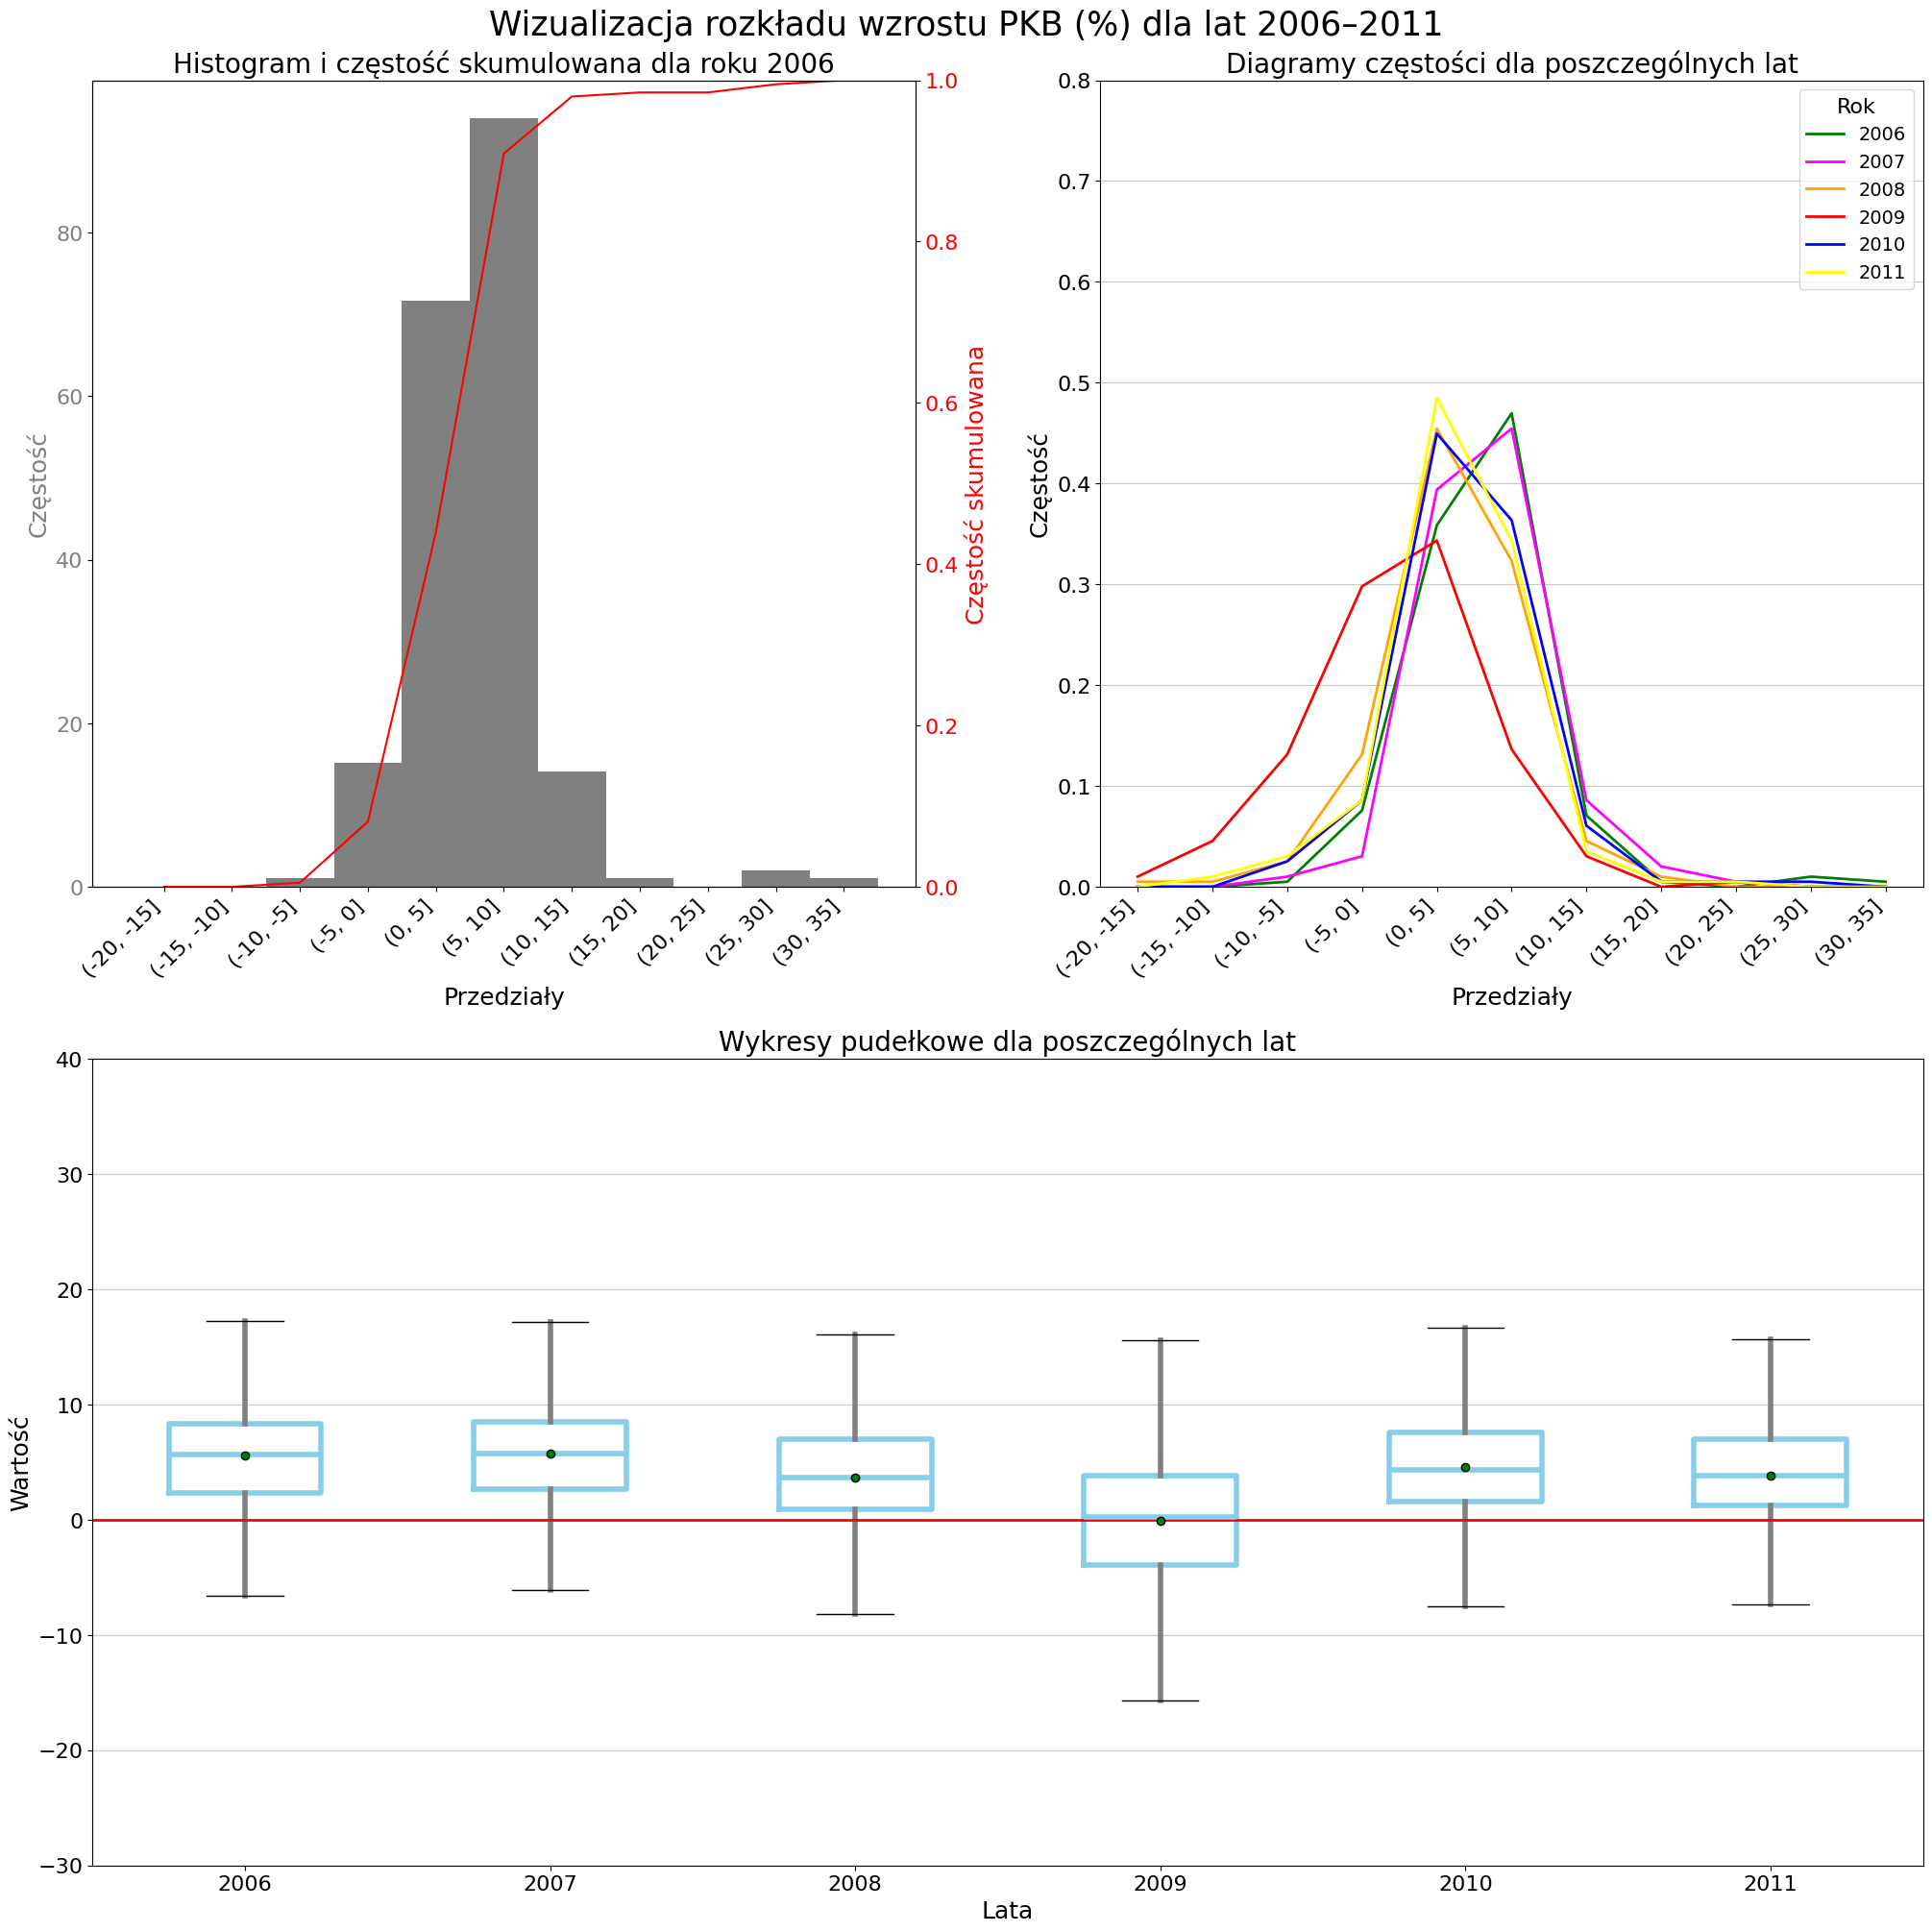

In [10]:
#figura
fig, axs = plt.subplot_mosaic(
    [['hist', 'freq'],
     ['box', 'box']],
    figsize=(20, 20),
    layout='constrained',
    subplot_kw={'facecolor': 'white'}
)
fig.suptitle("Wizualizacja rozkładu wzrostu PKB (%) dla lat 2006–2011", fontsize=25)

#histogram
year_raw = recession_table_1.loc['2006']
year = year_raw * 200
cum_freq = year_raw.cumsum() 
intervals = year_raw.index.astype(str)

ax1 = axs['hist']
ax2 = ax1.twinx()
#histogram
bars = ax1.bar(intervals, year, color='grey',width = 1)
ax1.set_ylabel("Częstość", color='grey', fontsize=18)
ax1.set_xlabel("Przedziały", fontsize=18)
ax1.tick_params(axis='both', labelsize=16)
ax1.tick_params(axis='y', labelcolor='grey')
ax1.set_xticks(np.arange(len(intervals)))
ax1.set_xticklabels(intervals, rotation=45, ha='right')
ax1.set_title(f"Histogram i częstość skumulowana dla roku {2006}", fontsize=20)

#linia czestosci
ax2.plot(intervals, cum_freq, color="red")
ax2.set_ylabel("Częstość skumulowana", color="red", fontsize=18)
ax2.tick_params(axis='y', labelcolor="red", labelsize=16)
ax2.set_ylim(0, 1)

#wykres czestosci
ax3 = axs['freq']

#petla dla kazdego rokucolors
colors = ['green', 'magenta', 'orange', 'red', 'blue', 'yellow']
for i, year in enumerate(recession_table_1.index):
    ax3.plot(intervals, recession_table_1.loc[year], label=year, color=colors[i], linewidth= 2)

ax3.set_title("Diagramy częstości dla poszczególnych lat", fontsize=20)
ax3.set_xlabel("Przedziały", fontsize=18)
ax3.set_ylabel("Częstość", fontsize=18)
ax3.set_xticks(np.arange(len(intervals)))
ax3.set_xticklabels(intervals, rotation=45, ha='right')
ax3.tick_params(axis='both', labelsize=16)
ax3.grid(axis='y', alpha=0.7)
ax3.set_ylim(0, 0.8)
ax3.legend(title="Rok", fontsize=14, title_fontsize=16, loc='upper right', frameon=True)

#pudelka
ax4 = axs['box']

#descriptive_parameters_2 nz bxp()
bxp_data = []
for col in descriptive_parameters_2.columns:
    box = {
        'label': col,
        'mean': descriptive_parameters_2.loc['mean', col],
        'med': descriptive_parameters_2.loc['Q2', col],
        'q1': descriptive_parameters_2.loc['Q1', col],
        'q3': descriptive_parameters_2.loc['Q3', col],
        'whislo': descriptive_parameters_2.loc['Q1', col] - 1.5 * (descriptive_parameters_2.loc['Q3', col] - descriptive_parameters_2.loc['Q1', col]),
        'whishi': descriptive_parameters_2.loc['Q3', col] + 1.5 * (descriptive_parameters_2.loc['Q3', col] - descriptive_parameters_2.loc['Q1', col]),
        'fliers': []
    }
    bxp_data.append(box)

ax4.bxp(
    bxp_data,
    showmeans=True,
    meanline=False,
    boxprops=dict(color='skyblue', linewidth=4),
    whiskerprops=dict(color='grey', linewidth=4),
    meanprops=dict(marker='o', markerfacecolor='green', markeredgecolor='black', markersize=6),
    medianprops=dict(color='skyblue', linewidth=4)
)
ax4.axhline(0, color='red', linewidth=2)

ax4.set_title("Wykresy pudełkowe dla poszczególnych lat", fontsize=20)
ax4.tick_params(axis='both', labelsize=16)
ax4.set_ylabel("Wartość", fontsize=18)
ax4.set_xlabel("Lata", fontsize=18)
ax4.grid(axis='y', alpha=0.7)
ax4.set_ylim(-30, 40)

plt.show()